<h1>The 6.3 Magnitude L'Aquila Earthquake on April 6, 2009 in Central Italy</h1>
<img src=https://upload.wikimedia.org/wikipedia/commons/e/e2/20090406_013242_umbria_quake_intensity.jpg>
The 2009 L'Aquila earthquake occurred in the region of Abruzzo, in central Italy. The main shock occurred at 03:32 CEST (01:32 UTC) on 6 April 2009, and was rated 5.8 or 5.9 on the Richter magnitude scale and 6.3 on the moment magnitude scale; its epicentre was near L'Aquila, the capital of Abruzzo, which together with surrounding villages suffered the most damage. There have been several thousand foreshocks and aftershocks since December 2008, more than thirty of which had a Richter magnitude greater than 3.5.

The earthquake was felt throughout central Italy; 308 people are known to have died, making this the deadliest earthquake to hit Italy since the 1980 Irpinia earthquake. In a subsequent inquiry of the handling of the disaster, seven members of the Italian National Commission for the Forecast and Prevention of Major Risks were accused of giving "inexact, incomplete and contradictory" information about the danger of the tremors prior to the main quake.On 22 October 2012, six scientists and one ex-government official were convicted of multiple manslaughter for downplaying the likelihood of a major earthquake six days before it took place. They were each sentenced to six years' imprisonment, but the verdict was overturned on 10 November 2014. Criticism was also applied to poor building standards that led to the failure of many modern buildings in a known earthquake zone: an official at Italy's Civil Protection Agency, Franco Barberi, said that "in California, an earthquake like this one would not have killed a single person".

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

In [2]:
endt = UTCDateTime("2009-04-06") 
startt = UTCDateTime("1999-04-06")
maxrad = 1.0
minmag = 2.0
lat = 42.3476
lon = 13.3800

In [3]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, 
                        maxradius=maxrad, minmagnitude=minmag, catalog="ISC")

In [4]:

cat.__str__(print_all=True)

'3644 Event(s) in Catalog:\n2009-04-05T22:56:43.890000Z | +42.988,  +13.626 | 2.3  Ml\n2009-04-05T22:39:42.840000Z | +42.339,  +13.376 | 3.3  mb\n2009-04-05T20:48:55.930000Z | +42.339,  +13.365 | 4.0  mb\n2009-04-03T06:43:24.800000Z | +42.313,  +13.368 | 2.5  Ml\n2009-04-03T05:48:03.500000Z | +42.316,  +13.367 | 2.1  Ml\n2009-04-03T05:10:35.400000Z | +42.319,  +13.371 | 2.0  Ml\n2009-04-03T05:08:31.400000Z | +42.316,  +13.371 | 2.0  Ml\n2009-04-03T04:44:42.880000Z | +42.318,  +13.361 | 2.8  Ml\n2009-04-02T11:11:54.200000Z | +42.310,  +13.374 | 2.6  Ml\n2009-04-02T09:46:18.500000Z | +42.351,  +13.374 | 2.1  Ml\n2009-04-01T18:24:17.600000Z | +42.316,  +13.370 | 2.3  Ml\n2009-04-01T17:14:11.300000Z | +42.318,  +13.375 | 2.1  Ml\n2009-04-01T15:15:38.300000Z | +42.343,  +13.365 | 2.3  Ml\n2009-04-01T10:23:28.300000Z | +42.328,  +13.367 | 2.5  Ml\n2009-04-01T05:37:36.200000Z | +42.312,  +13.367 | 2.0  Ml\n2009-04-01T02:56:51.000000Z | +42.319,  +13.366 | 2.1  Ml\n2009-03-31T11:14:10.600000Z 

In [5]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)

In [6]:
print(times[4],mags[4])

2009-04-03 05:48:03.500000 2.1


In [7]:
mtimes = mdates.date2num(times)

In [8]:
mtimes[4]

14337.241707175926

We are going to make a plot that shows the magnitude of all earthquakes in the catalog over time.

/var/folders/pl/n9dpnr6j189_tc7zv1jcdnph0000gn/T/ipykernel_3840/3737684298.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(mtimes,mags,marker='.')


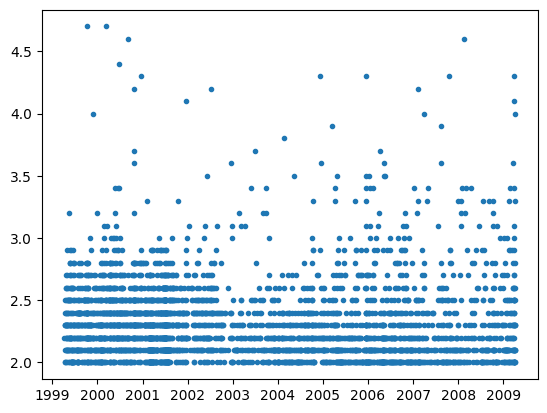

In [9]:
fig1 = plt.subplots(1,1)
plt.plot_date(mtimes,mags,marker='.')
# plt.ylim(2.5, 7)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

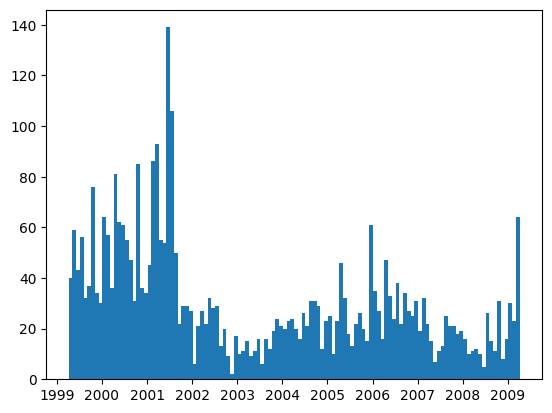

In [10]:
fig2, axes = plt.subplots(1,1)
axes.hist(mtimes, bins=120)
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show